<a href="https://colab.research.google.com/github/ricardocatelli/petro/blob/main/Rel_petro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***
# <font color=green size=10>Agência Nacional do Petróleo, Gás Natural e Biocombustíveis - ANP</font>
***

**ANP** é um centro de referência em dados e informações sobre a indústria de petróleo e gás natural:

- mantém o Banco de Dados de Exploração e Produção (BDEP);
- promove estudos sobre o potencial petrolífero e o desenvolvimento do setor;
- recebe e torna públicas as notificações de descobertas;
- divulga as estatísticas oficiais sobre reservas, refino e produção de petróleo, gás e biocombustíveis no Brasil.

Também realiza e divulga rotineiramente pesquisas sobre qualidade dos combustíveis e lubrificantes e sobre o comportamento dos preços desses produtos. Consolida e divulga informações sobre os mercados regulados e acerca dos investimentos em pesquisa, inovação e formação profissional voltadas para os setores regulados.

***
## <font color = green size = 6>Anuário Estatístico 2020</font>
***


O Anuário Estatístico Brasileiro do Petróleo, Gás Natural e Biocombustíveis 2020 consolida os dados referentes ao desempenho da indústria do petróleo, gás natural e biocombustíveis e do sistema de abastecimento nacionais no período 2010-2019. Estão disponíveis para consulta e download as tabelas integrantes do Anuário 2020 representadas em formato de dados abertos.

https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/anuario-estatistico-2020/secao-1/anuario-abertos-metadados-tabela1-2-convertido.pdf

In [8]:
import pandas  as pd
import numpy   as np
import seaborn as sns

### Dataset

In [1]:
url = 'https://raw.githubusercontent.com/ricardocatelli/petro/main/anuario-2020-abertos-tabela1-2.csv'

In [4]:
dados = pd.read_csv(url, sep = ';', decimal = ',')

In [5]:
dados.columns = ['Bloco Econômico', 'Região Geográfica', 'País', 'Produção em mil barris/dia', 'Ano']
dados.head()

,Bloco Econômico,Região Geográfica,País,Produção em mil barris/dia,Ano
0,NÃO OPEP,América do Norte,Canadá,3456.807609,2010
1,NÃO OPEP,América do Norte,Estados Unidos,7558.367110,2010
2,NÃO OPEP,América do Norte,México,2959.366480,2010
3,NÃO OPEP,Américas Central e do Sul,Argentina,711.840091,2010
4,NÃO OPEP,Américas Central e do Sul,Brasil,2125.051810,2010


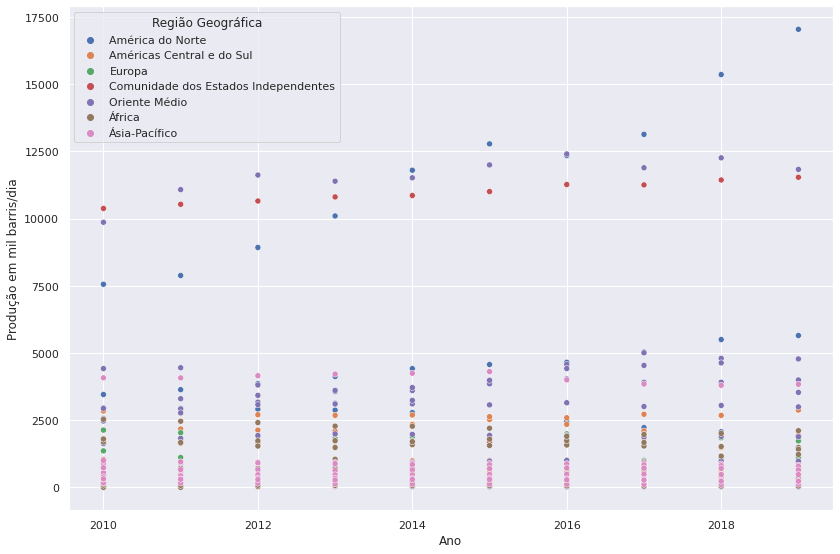

In [24]:
sns.set(rc={'figure.figsize':(13.7,9.27)})
sns.scatterplot(x= 'Ano', y= 'Produção em mil barris/dia', data=dados, hue ='Região Geográfica')

In [6]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Bloco Econômico             550 non-null    object 
 1   Região Geográfica           550 non-null    object 
 2   País                        550 non-null    object 
 3   Produção em mil barris/dia  550 non-null    float64
 4   Ano                         550 non-null    int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 21.6+ KB


Avaliando nosso dataset percebemos que não possuímos valores nulos nas variáveis analisadas.

In [ ]:
dados.shape

(550, 5)

In [ ]:
print('A base de dados nos apresentav {} registros e {} ariáveis'.format(dados.shape[0], dados.shape[1]))

A base de dados nos apresenta 550 registros e 5 variáveis


### Bloco Econômico

O Bloco identifica a qual bloco
econômico o país pertence
(OPEP ou NÃO OPEP). A OPEP –
Organização dos países
exportadores de petróleo - é
uma organização internacional
criada em 1960 na Conferência
de Bagdá que visa coordenar de
maneira centralizada a política
petrolífera dos países membros

In [ ]:
dados['Bloco Econômico'].unique()

array(['NÃO OPEP', 'OPEP'], dtype=object)

### Região Geográfica

Região Geográfica – América do
Norte, Américas Central e do Sul,
Europa, Comunidade dos Estados
Independentes, Oriente Médio,
África e Ásia-Pacífico

In [ ]:
dados['Região Geográfica'].unique()

array(['América do Norte', 'Américas Central e do Sul', 'Europa',
       'Comunidade dos Estados Independentes', 'Oriente Médio', 'África',
       'Ásia-Pacífico'], dtype=object)

### País

País produtor de petróleo 

In [ ]:
print('No total foram avaliados %s países dividos em %s regiões diferentes' % (len(dados['País'].unique()), (len(dados['Região Geográfica'].unique()))))

No total foram avaliados 50 países dividos em 7 regiões diferentes


### Produção em mil barris/dia

Produção de petróleo, em milhares de barris por dia. 

Para melhor compreensão dos valores de produção, trabalharemos também com a variável 'Produção em barris/dia' buscando apresentar a produção em sua totalidade.

In [ ]:
dados['Produção em barris/dia'] = dados['Produção em mil barris/dia'] * 1000

In [ ]:
dados.head()

,Bloco Econômico,Região Geográfica,País,Produção em mil barris/dia,Ano,Produção em barris/dia
0,NÃO OPEP,América do Norte,Canadá,3456.81,2010,3456807.61
1,NÃO OPEP,América do Norte,Estados Unidos,7558.37,2010,7558367.11
2,NÃO OPEP,América do Norte,México,2959.37,2010,2959366.48
3,NÃO OPEP,Américas Central e do Sul,Argentina,711.84,2010,711840.09
4,NÃO OPEP,Américas Central e do Sul,Brasil,2125.05,2010,2125051.81


### Ano

Ano de produção

In [ ]:
dados['Ano'].unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])

O levantamento realizado corresponde à década de 2010 a 2019

***
## <font color = green size = 6>Análise das Variáveis</font>
***

### Bloco Econômico


Como vimos anteriormente, esta variável identifica a qual bloco econômico o país pertence (OPEP ou NÃO OPEP). 

A **OPEP – Organização dos países exportadores de petróleo** - é uma organização internacional criada em 1960 na Conferência de Bagdá que visa coordenar de maneira centralizada a política petrolífera dos países membros.

Primeiramente vamos conhecer quais são os países que compõem esses blocos.

#### Países OPEP

In [ ]:
dados['Bloco Econômico'].unique()

array(['NÃO OPEP', 'OPEP'], dtype=object)

In [ ]:
opep = ['OPEP']

In [ ]:
dados['Bloco Econômico'].isin(opep).head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6     True
7    False
8    False
9     True
Name: Bloco Econômico, dtype: bool

In [ ]:
select = dados['Bloco Econômico'].isin(opep)

In [ ]:
dados_opep = dados[select]

In [ ]:
dados_opep = pd.DataFrame(dados_opep['País'])
dados_opep.index = range(dados_opep.shape[0])
dados_opep = dados_opep.drop_duplicates()
dados_opep

,País
0,Equador
1,Venezuela
2,Arábia Saudita
3,Coveite
4,Emirados Árabes Unidos
5,Irã
6,Iraque
7,Argélia
8,Angola
9,Congo


#### Países Não OPEP

Para conhecer os países que não participam da Organização dos Países Exportadores de Petróleo invertemos a seleção.

In [ ]:
dados_nao_opep = dados[~select]

In [ ]:
dados_nao_opep = pd.DataFrame(dados_nao_opep['País'])
dados_nao_opep.index = range(dados_nao_opep.shape[0])
dados_nao_opep = dados_nao_opep.drop_duplicates()
dados_nao_opep

,País
0,Canadá
1,Estados Unidos
2,México
3,Argentina
4,Brasil
5,Colômbia
6,Peru
7,Trinidad e Tobago
8,Outros
9,Dinamarca
